In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr, chi2_contingency

# 1. FoodPrice in Turkey

In [2]:
df = pd.read_csv('Data/FoodPrice_in_Turkey.csv')
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


## 1.1 Giữa giá gạo ở National Average và thời gian có mối liên hệ với nhau hay không

In [14]:
rice_data = df[(df.ProductName == "Rice - Retail") & ( df.Place == "National Average")]
rice_data['time'] = pd.to_datetime(rice_data['Month'].astype(str) + '/' + rice_data['Year'].astype(str))
rice_data.describe()

/tmp/ipykernel_13520/2971135424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rice_data['time'] = pd.to_datetime(rice_data['Month'].astype(str) + '/' + rice_data['Year'].astype(str))


,ProductId,UmId,Month,Year,Price
count,66.0,66.0,66.000000,66.000000,66.000000
mean,52.0,5.0,6.454545,2016.257576,7.084923
std,0.0,0.0,3.561252,1.947864,1.417041
min,52.0,5.0,1.000000,2013.000000,4.492000
25%,52.0,5.0,3.000000,2015.000000,6.117500
50%,52.0,5.0,6.000000,2016.000000,6.523500
75%,52.0,5.0,9.750000,2018.000000,8.401025
max,52.0,5.0,12.000000,2019.000000,9.561600


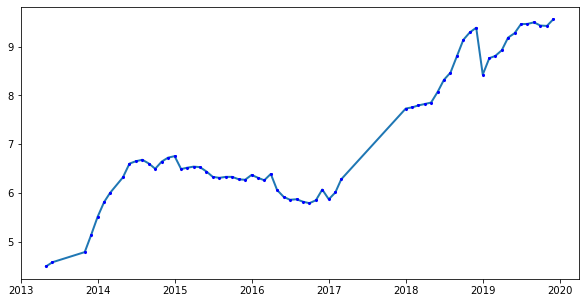

In [21]:
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(rice_data['time'], rice_data['Price'], linewidth = 2, 
         marker = '*', markersize=2, markerfacecolor='red',
         markeredgecolor = 'blue', markeredgewidth=2)
plt.show()

### Biến đổi thời gian lấy 1/2013 làm mốc .

/tmp/ipykernel_13520/2101671821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rice_data['time_by_month'] = rice_data['Month'] + (rice_data['Year'] - 2013)*12


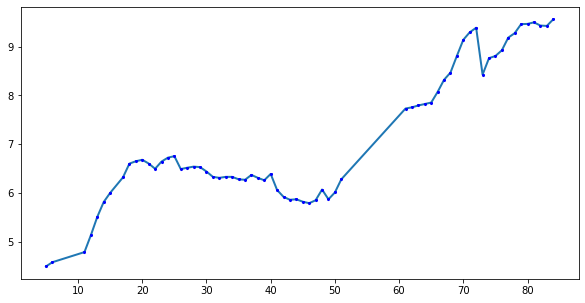

In [23]:
rice_data['time_by_month'] = rice_data['Month'] + (rice_data['Year'] - 2013)*12
plt.plot(rice_data['time_by_month'], rice_data['Price'], linewidth = 2,
        marker = '*', markersize = 2, markerfacecolor = 'red',
        markeredgecolor = 'blue', markeredgewidth = 2)
plt.show()

### Phát biểu giả thuyết 
- H0 : thời gian và giá gạo không có quan hệ.
- H1 : thời gian và gạo có mỗi quan hệ tương quan.

In [24]:
r, pvalue = pearsonr(x = rice_data['time_by_month'], y = rice_data['Price'])
print(f'Hệ số tương quan Pearson: {r}')
print(f'p-value: {pvalue}')

Hệ số tương quan Pearson: 0.8836736355854856
p-value: 8.931326276852843e-23


### Kết luận : p-value rất nhỏ và r = 0.88
- Giữa thời gian và giá gạo có mối tương quan thuận rất chặt với nhau.

# 2. Shopee korean shop

In [38]:
df = pd.read_csv('Data/shopeep_koreantop_clothing_shop_data.csv')
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


In [39]:
df.describe()

,pk_shop,shopid,join_day,join_year,item_count,follower_count,response_rate,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
count,7.460000e+02,7.460000e+02,746.000000,746.000000,746.000000,7.460000e+02,746.000000,746.000000,7.460000e+02,746.000000,740.000000,746.000000,746.000000
mean,1.367361e+16,2.032431e+08,16.663539,2018.985255,482.886059,9.989943e+04,78.044236,2049.020107,9.720686e+04,4175.920912,4.740811,0.269437,0.005362
std,8.764287e+15,1.425216e+08,8.897669,1.528625,604.620925,2.627164e+05,22.534672,9232.920595,3.417680e+05,15174.949308,0.152888,0.443965,0.073078
min,2.021061e+14,1.083822e+06,1.000000,2015.000000,1.000000,6.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,4.060000,0.000000,0.000000
25%,2.021063e+15,5.034141e+07,9.000000,2017.250000,145.500000,2.024000e+03,67.000000,15.250000,7.002500e+02,35.000000,4.640000,0.000000,0.000000
50%,2.021062e+16,2.054244e+08,17.000000,2019.000000,311.000000,1.690450e+04,86.000000,117.000000,7.320000e+03,351.500000,4.780000,0.000000,0.000000
75%,2.021063e+16,3.182721e+08,24.000000,2020.000000,526.000000,6.644100e+04,96.000000,676.250000,3.484100e+04,1605.500000,4.860000,1.000000,0.000000
max,2.021071e+16,4.689597e+08,31.000000,2021.000000,4739.000000,2.039888e+06,100.000000,102833.000000,3.403406e+06,153076.000000,5.000000,1.000000,1.000000


## 2.1 Giữa rating_star và follower_count có tương quan với nhau hay không

In [40]:
# Xóa các dòng chứa giá trị nan
df1 = df.dropna(subset=['rating_star','follower_count'])

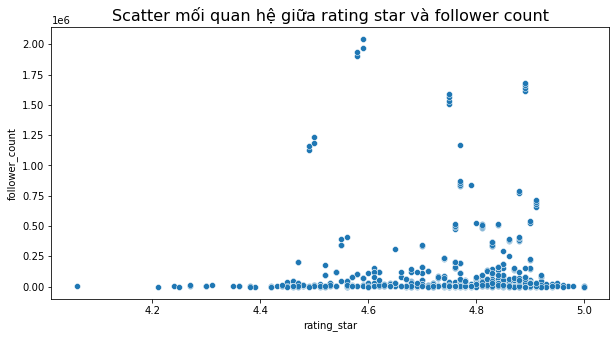

In [41]:
sns.scatterplot(x = 'rating_star', y = 'follower_count', data = df1)
plt.title('Scatter mối quan hệ giữa rating star và follower count', fontsize = 16)
plt.show()

- Qua scatter ta có thể  nhận thấy : đa số  khi `rating star` càng cao thì `follower count` không thay đổi quá nhiều.

### Phát biểu giả thuyết :
- H0 : rating star và follower count không có mối quan hệ
- H1 : rating star và follower count có mối quan hệ

In [42]:
r , pvalue = pearsonr(x = df1['rating_star'], y = df1['follower_count'])
print(f'Hệ số tương quan Pearson: {r}')
print(f'p-value: {pvalue}')

Hệ số tương quan Pearson: 0.02749005984630104
p-value: 0.4552522676325689


### Kết luận : pvalue >> 0.05 , r nhỏ
- Chưa đủ cơ sở bác bỏ H0
- Vậy giữa rating star và follower count không có mối quan hệ tuyến tính với nhau.

## 2.2 Giữa rating_star và số lượng sản phẩm (item_count) có tương quan với nhau hay không

In [43]:
# Xóa các dòng chứa giá trị nan
df2 = df.dropna(subset=['rating_star','item_count'])

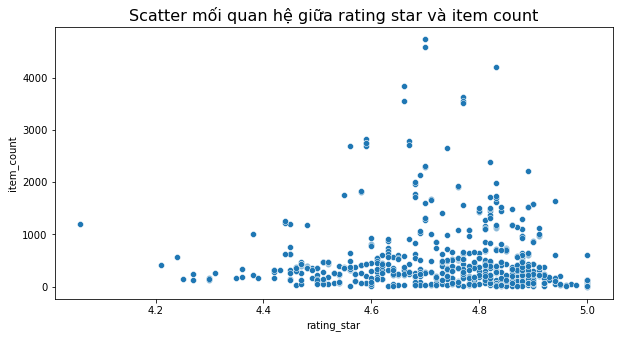

In [44]:
sns.scatterplot(x = 'rating_star', y = 'item_count', data = df2)
plt.title('Scatter mối quan hệ giữa rating star và item count', fontsize = 16)
plt.show()

In [45]:
r , pvalue = pearsonr(x = df2['rating_star'], y = df2['item_count'])
print(f'Hệ số tương quan Pearson: {r}')
print(f'p-value: {pvalue}')

Hệ số tương quan Pearson: -0.03732626070920735
p-value: 0.3105727616062792


### Kết luận : pvalue >> 0.05 , r nhỏ
- Chưa đủ cơ sở bác bỏ H0
- Vậy giữa rating star và item count không có mối quan hệ tuyến tính với nhau.

## 2.3 Giữa is_shopee_verified và việc có cửa hàng trưng bày (is_official_shop) có tương quan với nhau hay không

In [46]:
# Xóa các dòng chứa giá trị nan
df3 = df.dropna(subset=['is_shopee_verified','is_official_shop'])

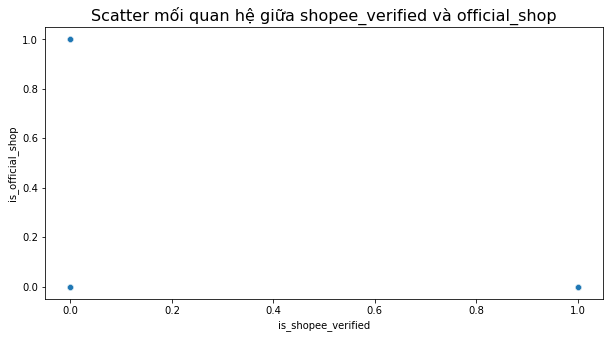

In [47]:
sns.scatterplot(x = 'is_shopee_verified', y = 'is_official_shop', data = df3)
plt.title('Scatter mối quan hệ giữa shopee_verified và official_shop', fontsize = 16)
plt.show()

### Sử dụng Chi - Square

In [53]:
crosstable = pd.crosstab(index = df3['is_official_shop'], columns= df3['is_shopee_verified'])
crosstable

is_shopee_verified,0,1
is_official_shop,,
0,541,201
1,4,0


- Vì giá trị tổi thiểu phải là 5 nên không thể sử dụng ChiSquare 

### Sử dụng Pearson

In [55]:
r , pvalue = pearsonr(x = df3['is_shopee_verified'], y = df3['is_official_shop'])
print(f'Hệ số tương quan Pearson: {r}')
print(f'p-value: {pvalue}')

Hệ số tương quan Pearson: -0.044589009043606104
p-value: 0.22382403995765798


### Kết luận : pvalue >> 0.05 , r nhỏ
- Chưa đủ cơ sở bác bỏ H0
- Vậy giữa is_shopee_verified và is_official_shop không có mối quan hệ tuyến tính với nhau.